<a href="https://colab.research.google.com/github/AndreLovo/Analise-de-dados/blob/master/Energia_Ren_USA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [137]:
# Tabela Energia Renovável USA
 
# Importando as dependencias do Seaborn
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [138]:
df_energia = pd.read_csv('/content/drive/My Drive/Colab Notebooks/Energia_Renovavel/datasets_82851_192539_Net_generation_for_all_sectors.csv')
df_energia

,description,units,source key,Jan 2001,Feb 2001,Mar 2001,Apr 2001,May 2001,Jun 2001,Jul 2001,Aug 2001,Sep 2001,Oct 2001,Nov 2001,Dec 2001,Jan 2002,Feb 2002,Mar 2002,Apr 2002,May 2002,Jun 2002,Jul 2002,Aug 2002,Sep 2002,Oct 2002,Nov 2002,Dec 2002,Jan 2003,Feb 2003,Mar 2003,Apr 2003,May 2003,Jun 2003,Jul 2003,Aug 2003,Sep 2003,Oct 2003,Nov 2003,Dec 2003,Jan 2004,...,Aug 2013,Sep 2013,Oct 2013,Nov 2013,Dec 2013,Jan 2014,Feb 2014,Mar 2014,Apr 2014,May 2014,Jun 2014,Jul 2014,Aug 2014,Sep 2014,Oct 2014,Nov 2014,Dec 2014,Jan 2015,Feb 2015,Mar 2015,Apr 2015,May 2015,Jun 2015,Jul 2015,Aug 2015,Sep 2015,Oct 2015,Nov 2015,Dec 2015,Jan 2016,Feb 2016,Mar 2016,Apr 2016,May 2016,Jun 2016,Jul 2016,Aug 2016,Sep 2016,Oct 2016,Nov 2016
0,Net generation for all sectors,thousand megawatthours,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,United States,NaN,ELEC.GEN..M,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,United States : all fuels (utility-scale),NaN,ELEC.GEN.ALL-US-99.M,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,United States : other renewables,thousand megawatthours,ELEC.GEN.AOR-US-99.M,6025.0,5310.0,5795.0,5827.0,5738.0,5964.0,6244.0,6293.0,5770.0,6050.0,5713.0,6038.0,6599.0,5800.0,6354.0,6543.0,6760.0,7066.0,7056.0,7044.0,6582.0,6559.0,6250.0,6497.0,6500.0,5962.0,6719.0,6674.0,6473.0,6678.0,7009.0,6790.0,6537.0,6548.0,6531.0,7067.0,6888.0,...,17382.0,18991.0,21058.0,23030.0,21626.0,25493.0,21001.0,25851.0,26476.0,23822.0,24464.0,21044.0,19021.0,19893.0,22718.0,26807.0,22621.0,23121.0,22561.0,23943.0,26494.0,26182.0,22561.0,23454.0,22821.0,22647.0,24708.0,28065.0,28602.0,26679.0,28738.0,31084.0,29666.0,28711.0,26236.0,28372.0,24465.0,26529.0,29749.0,28819.0
4,United States : wind,thousand megawatthours,ELEC.GEN.WND-US-99.M,389.0,431.0,532.0,685.0,635.0,670.0,635.0,577.0,490.0,607.0,470.0,616.0,811.0,714.0,852.0,1024.0,1078.0,1126.0,890.0,977.0,736.0,734.0,656.0,755.0,632.0,745.0,1036.0,1093.0,1006.0,1047.0,953.0,815.0,895.0,897.0,961.0,1105.0,999.0,...,9634.0,11674.0,13635.0,15803.0,13967.0,17911.0,14009.0,17736.0,18636.0,15601.0,15799.0,12187.0,10171.0,11520.0,14508.0,18867.0,14711.0,15162.0,14922.0,15308.0,17867.0,17151.0,13421.0,13675.0,13080.0,13972.0,16380.0,19682.0,20098.0,18466.0,20138.0,21939.0,20799.0,18848.0,16303.0,17618.0,13589.0,16404.0,20335.0,19406.0
5,United States : all utility-scale solar,thousand megawatthours,ELEC.GEN.SUN-US-99.M,7.0,13.0,31.0,39.0,81.0,91.0,92.0,85.0,65.0,21.0,14.0,4.0,11.0,24.0,44.0,46.0,58.0,96.0,86.0,75.0,53.0,31.0,28.0,4.0,13.0,18.0,50.0,60.0,68.0,91.0,62.0,62.0,56.0,35.0,14.0,4.0,13.0,...,944.0,949.0,988.0,824.0,850.0,751.0,835.0,1317.0,1487.0,1750.0,1923.0,1788.0,1879.0,1832.0,1717.0,1380.0,1032.0,1155.0,1484.0,2072.0,2379.0,2504.0,2558.0,2627.0,2688.0,2217.0,1910.0,1730.0,1570.0,1486.0,2242.0,2617.0,2880.0,3425.0,3473.0,3945.0,3969.0,3635.0,3191.0,2767.0
6,United States : geothermal,thousand megawatthours,ELEC.GEN.GEO-US-99.M,1229.0,1073.0,1190.0,1095.0,1071.0,1088.0,1179.0,1167.0,1139.0,1162.0,1157.0,1190.0,1287.0,1132.0,1245.0,1115.0,1216.0,1151.0,1262.0,1227.0,1195.0,1235.0,1189.0,1236.0,1258.0,1130.0,1213.0,1166.0,1169.0,1223.0,1228.0,1219.0,1203.0,1195.0,1151.0,1268.0,1295.0,...,1322.0,1299.0,

In [139]:
# Excluindo a coluna sorce Key # inplace = a mudança é realizada definitiva - axis = 1 retiro a coluna 
df_energia.drop('source key', axis=1, inplace=False)
df_energia

,description,units,source key,Jan 2001,Feb 2001,Mar 2001,Apr 2001,May 2001,Jun 2001,Jul 2001,Aug 2001,Sep 2001,Oct 2001,Nov 2001,Dec 2001,Jan 2002,Feb 2002,Mar 2002,Apr 2002,May 2002,Jun 2002,Jul 2002,Aug 2002,Sep 2002,Oct 2002,Nov 2002,Dec 2002,Jan 2003,Feb 2003,Mar 2003,Apr 2003,May 2003,Jun 2003,Jul 2003,Aug 2003,Sep 2003,Oct 2003,Nov 2003,Dec 2003,Jan 2004,...,Aug 2013,Sep 2013,Oct 2013,Nov 2013,Dec 2013,Jan 2014,Feb 2014,Mar 2014,Apr 2014,May 2014,Jun 2014,Jul 2014,Aug 2014,Sep 2014,Oct 2014,Nov 2014,Dec 2014,Jan 2015,Feb 2015,Mar 2015,Apr 2015,May 2015,Jun 2015,Jul 2015,Aug 2015,Sep 2015,Oct 2015,Nov 2015,Dec 2015,Jan 2016,Feb 2016,Mar 2016,Apr 2016,May 2016,Jun 2016,Jul 2016,Aug 2016,Sep 2016,Oct 2016,Nov 2016
0,Net generation for all sectors,thousand megawatthours,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,United States,NaN,ELEC.GEN..M,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,United States : all fuels (utility-scale),NaN,ELEC.GEN.ALL-US-99.M,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,United States : other renewables,thousand megawatthours,ELEC.GEN.AOR-US-99.M,6025.0,5310.0,5795.0,5827.0,5738.0,5964.0,6244.0,6293.0,5770.0,6050.0,5713.0,6038.0,6599.0,5800.0,6354.0,6543.0,6760.0,7066.0,7056.0,7044.0,6582.0,6559.0,6250.0,6497.0,6500.0,5962.0,6719.0,6674.0,6473.0,6678.0,7009.0,6790.0,6537.0,6548.0,6531.0,7067.0,6888.0,...,17382.0,18991.0,21058.0,23030.0,21626.0,25493.0,21001.0,25851.0,26476.0,23822.0,24464.0,21044.0,19021.0,19893.0,22718.0,26807.0,22621.0,23121.0,22561.0,23943.0,26494.0,26182.0,22561.0,23454.0,22821.0,22647.0,24708.0,28065.0,28602.0,26679.0,28738.0,31084.0,29666.0,28711.0,26236.0,28372.0,24465.0,26529.0,29749.0,28819.0
4,United States : wind,thousand megawatthours,ELEC.GEN.WND-US-99.M,389.0,431.0,532.0,685.0,635.0,670.0,635.0,577.0,490.0,607.0,470.0,616.0,811.0,714.0,852.0,1024.0,1078.0,1126.0,890.0,977.0,736.0,734.0,656.0,755.0,632.0,745.0,1036.0,1093.0,1006.0,1047.0,953.0,815.0,895.0,897.0,961.0,1105.0,999.0,...,9634.0,11674.0,13635.0,15803.0,13967.0,17911.0,14009.0,17736.0,18636.0,15601.0,15799.0,12187.0,10171.0,11520.0,14508.0,18867.0,14711.0,15162.0,14922.0,15308.0,17867.0,17151.0,13421.0,13675.0,13080.0,13972.0,16380.0,19682.0,20098.0,18466.0,20138.0,21939.0,20799.0,18848.0,16303.0,17618.0,13589.0,16404.0,20335.0,19406.0
5,United States : all utility-scale solar,thousand megawatthours,ELEC.GEN.SUN-US-99.M,7.0,13.0,31.0,39.0,81.0,91.0,92.0,85.0,65.0,21.0,14.0,4.0,11.0,24.0,44.0,46.0,58.0,96.0,86.0,75.0,53.0,31.0,28.0,4.0,13.0,18.0,50.0,60.0,68.0,91.0,62.0,62.0,56.0,35.0,14.0,4.0,13.0,...,944.0,949.0,988.0,824.0,850.0,751.0,835.0,1317.0,1487.0,1750.0,1923.0,1788.0,1879.0,1832.0,1717.0,1380.0,1032.0,1155.0,1484.0,2072.0,2379.0,2504.0,2558.0,2627.0,2688.0,2217.0,1910.0,1730.0,1570.0,1486.0,2242.0,2617.0,2880.0,3425.0,3473.0,3945.0,3969.0,3635.0,3191.0,2767.0
6,United States : geothermal,thousand megawatthours,ELEC.GEN.GEO-US-99.M,1229.0,1073.0,1190.0,1095.0,1071.0,1088.0,1179.0,1167.0,1139.0,1162.0,1157.0,1190.0,1287.0,1132.0,1245.0,1115.0,1216.0,1151.0,1262.0,1227.0,1195.0,1235.0,1189.0,1236.0,1258.0,1130.0,1213.0,1166.0,1169.0,1223.0,1228.0,1219.0,1203.0,1195.0,1151.0,1268.0,1295.0,...,1322.0,1299.0,

In [140]:
# Excluindo as linhas indices 1 e 2 
df_energia.drop(1, axis=0, inplace=True) # inplace = a mudança é realizada - axis=0 retiro a linha - 
df_energia.drop(2, axis=0, inplace=True)

df_energia

,description,units,source key,Jan 2001,Feb 2001,Mar 2001,Apr 2001,May 2001,Jun 2001,Jul 2001,Aug 2001,Sep 2001,Oct 2001,Nov 2001,Dec 2001,Jan 2002,Feb 2002,Mar 2002,Apr 2002,May 2002,Jun 2002,Jul 2002,Aug 2002,Sep 2002,Oct 2002,Nov 2002,Dec 2002,Jan 2003,Feb 2003,Mar 2003,Apr 2003,May 2003,Jun 2003,Jul 2003,Aug 2003,Sep 2003,Oct 2003,Nov 2003,Dec 2003,Jan 2004,...,Aug 2013,Sep 2013,Oct 2013,Nov 2013,Dec 2013,Jan 2014,Feb 2014,Mar 2014,Apr 2014,May 2014,Jun 2014,Jul 2014,Aug 2014,Sep 2014,Oct 2014,Nov 2014,Dec 2014,Jan 2015,Feb 2015,Mar 2015,Apr 2015,May 2015,Jun 2015,Jul 2015,Aug 2015,Sep 2015,Oct 2015,Nov 2015,Dec 2015,Jan 2016,Feb 2016,Mar 2016,Apr 2016,May 2016,Jun 2016,Jul 2016,Aug 2016,Sep 2016,Oct 2016,Nov 2016
0,Net generation for all sectors,thousand megawatthours,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,United States : other renewables,thousand megawatthours,ELEC.GEN.AOR-US-99.M,6025.0,5310.0,5795.0,5827.0,5738.0,5964.0,6244.0,6293.0,5770.0,6050.0,5713.0,6038.0,6599.0,5800.0,6354.0,6543.0,6760.0,7066.0,7056.0,7044.0,6582.0,6559.0,6250.0,6497.0,6500.0,5962.0,6719.0,6674.0,6473.0,6678.0,7009.0,6790.0,6537.0,6548.0,6531.0,7067.0,6888.0,...,17382.0,18991.0,21058.0,23030.0,21626.0,25493.0,21001.0,25851.0,26476.0,23822.0,24464.0,21044.0,19021.0,19893.0,22718.0,26807.0,22621.0,23121.0,22561.0,23943.0,26494.0,26182.0,22561.0,23454.0,22821.0,22647.0,24708.0,28065.0,28602.0,26679.0,28738.0,31084.0,29666.0,28711.0,26236.0,28372.0,24465.0,26529.0,29749.0,28819.0
4,United States : wind,thousand megawatthours,ELEC.GEN.WND-US-99.M,389.0,431.0,532.0,685.0,635.0,670.0,635.0,577.0,490.0,607.0,470.0,616.0,811.0,714.0,852.0,1024.0,1078.0,1126.0,890.0,977.0,736.0,734.0,656.0,755.0,632.0,745.0,1036.0,1093.0,1006.0,1047.0,953.0,815.0,895.0,897.0,961.0,1105.0,999.0,...,9634.0,11674.0,13635.0,15803.0,13967.0,17911.0,14009.0,17736.0,18636.0,15601.0,15799.0,12187.0,10171.0,11520.0,14508.0,18867.0,14711.0,15162.0,14922.0,15308.0,17867.0,17151.0,13421.0,13675.0,13080.0,13972.0,16380.0,19682.0,20098.0,18466.0,20138.0,21939.0,20799.0,18848.0,16303.0,17618.0,13589.0,16404.0,20335.0,19406.0
5,United States : all utility-scale solar,thousand megawatthours,ELEC.GEN.SUN-US-99.M,7.0,13.0,31.0,39.0,81.0,91.0,92.0,85.0,65.0,21.0,14.0,4.0,11.0,24.0,44.0,46.0,58.0,96.0,86.0,75.0,53.0,31.0,28.0,4.0,13.0,18.0,50.0,60.0,68.0,91.0,62.0,62.0,56.0,35.0,14.0,4.0,13.0,...,944.0,949.0,988.0,824.0,850.0,751.0,835.0,1317.0,1487.0,1750.0,1923.0,1788.0,1879.0,1832.0,1717.0,1380.0,1032.0,1155.0,1484.0,2072.0,2379.0,2504.0,2558.0,2627.0,2688.0,2217.0,1910.0,1730.0,1570.0,1486.0,2242.0,2617.0,2880.0,3425.0,3473.0,3945.0,3969.0,3635.0,3191.0,2767.0
6,United States : geothermal,thousand megawatthours,ELEC.GEN.GEO-US-99.M,1229.0,1073.0,1190.0,1095.0,1071.0,1088.0,1179.0,1167.0,1139.0,1162.0,1157.0,1190.0,1287.0,1132.0,1245.0,1115.0,1216.0,1151.0,1262.0,1227.0,1195.0,1235.0,1189.0,1236.0,1258.0,1130.0,1213.0,1166.0,1169.0,1223.0,1228.0,1219.0,1203.0,1195.0,1151.0,1268.0,1295.0,...,1322.0,1299.0,1363.0,1230.0,1366.0,1355.0,1206.0,1338.0,1314.0,1332.0,1293.0,1320.0,1329.0,1308.0,1345.0,1362.0,1375.0,1362.0,1260.0,1394.0,1272.0,1390.0,1302.0,1357.0,1344.0,1203.0,1323.0,1334.0,1377.0,1332.0,1243.0,1315.0,1209.0,1342.0,1251.0,1311.0,1324.0,1327.0,1353.0,1364.0
7,United States : biomass,NaN,ELEC.GEN.BIO-US-99.M,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8,United States : wood and wood-derived fuels,thousand megawatthours,ELEC.GEN.WWW-US-99.M,3191.0

In [141]:
# Retirando todos os valores NaN - preciso criar outro DataFrame para 
# receber a nova tabela
df_energia1 = df_energia.dropna()
df_energia1

,description,units,source key,Jan 2001,Feb 2001,Mar 2001,Apr 2001,May 2001,Jun 2001,Jul 2001,Aug 2001,Sep 2001,Oct 2001,Nov 2001,Dec 2001,Jan 2002,Feb 2002,Mar 2002,Apr 2002,May 2002,Jun 2002,Jul 2002,Aug 2002,Sep 2002,Oct 2002,Nov 2002,Dec 2002,Jan 2003,Feb 2003,Mar 2003,Apr 2003,May 2003,Jun 2003,Jul 2003,Aug 2003,Sep 2003,Oct 2003,Nov 2003,Dec 2003,Jan 2004,...,Aug 2013,Sep 2013,Oct 2013,Nov 2013,Dec 2013,Jan 2014,Feb 2014,Mar 2014,Apr 2014,May 2014,Jun 2014,Jul 2014,Aug 2014,Sep 2014,Oct 2014,Nov 2014,Dec 2014,Jan 2015,Feb 2015,Mar 2015,Apr 2015,May 2015,Jun 2015,Jul 2015,Aug 2015,Sep 2015,Oct 2015,Nov 2015,Dec 2015,Jan 2016,Feb 2016,Mar 2016,Apr 2016,May 2016,Jun 2016,Jul 2016,Aug 2016,Sep 2016,Oct 2016,Nov 2016
3,United States : other renewables,thousand megawatthours,ELEC.GEN.AOR-US-99.M,6025.0,5310.0,5795.0,5827.0,5738.0,5964.0,6244.0,6293.0,5770.0,6050.0,5713.0,6038.0,6599.0,5800.0,6354.0,6543.0,6760.0,7066.0,7056.0,7044.0,6582.0,6559.0,6250.0,6497.0,6500.0,5962.0,6719.0,6674.0,6473.0,6678.0,7009.0,6790.0,6537.0,6548.0,6531.0,7067.0,6888.0,...,17382.0,18991.0,21058.0,23030.0,21626.0,25493.0,21001.0,25851.0,26476.0,23822.0,24464.0,21044.0,19021.0,19893.0,22718.0,26807.0,22621.0,23121.0,22561.0,23943.0,26494.0,26182.0,22561.0,23454.0,22821.0,22647.0,24708.0,28065.0,28602.0,26679.0,28738.0,31084.0,29666.0,28711.0,26236.0,28372.0,24465.0,26529.0,29749.0,28819.0
4,United States : wind,thousand megawatthours,ELEC.GEN.WND-US-99.M,389.0,431.0,532.0,685.0,635.0,670.0,635.0,577.0,490.0,607.0,470.0,616.0,811.0,714.0,852.0,1024.0,1078.0,1126.0,890.0,977.0,736.0,734.0,656.0,755.0,632.0,745.0,1036.0,1093.0,1006.0,1047.0,953.0,815.0,895.0,897.0,961.0,1105.0,999.0,...,9634.0,11674.0,13635.0,15803.0,13967.0,17911.0,14009.0,17736.0,18636.0,15601.0,15799.0,12187.0,10171.0,11520.0,14508.0,18867.0,14711.0,15162.0,14922.0,15308.0,17867.0,17151.0,13421.0,13675.0,13080.0,13972.0,16380.0,19682.0,20098.0,18466.0,20138.0,21939.0,20799.0,18848.0,16303.0,17618.0,13589.0,16404.0,20335.0,19406.0
5,United States : all utility-scale solar,thousand megawatthours,ELEC.GEN.SUN-US-99.M,7.0,13.0,31.0,39.0,81.0,91.0,92.0,85.0,65.0,21.0,14.0,4.0,11.0,24.0,44.0,46.0,58.0,96.0,86.0,75.0,53.0,31.0,28.0,4.0,13.0,18.0,50.0,60.0,68.0,91.0,62.0,62.0,56.0,35.0,14.0,4.0,13.0,...,944.0,949.0,988.0,824.0,850.0,751.0,835.0,1317.0,1487.0,1750.0,1923.0,1788.0,1879.0,1832.0,1717.0,1380.0,1032.0,1155.0,1484.0,2072.0,2379.0,2504.0,2558.0,2627.0,2688.0,2217.0,1910.0,1730.0,1570.0,1486.0,2242.0,2617.0,2880.0,3425.0,3473.0,3945.0,3969.0,3635.0,3191.0,2767.0
6,United States : geothermal,thousand megawatthours,ELEC.GEN.GEO-US-99.M,1229.0,1073.0,1190.0,1095.0,1071.0,1088.0,1179.0,1167.0,1139.0,1162.0,1157.0,1190.0,1287.0,1132.0,1245.0,1115.0,1216.0,1151.0,1262.0,1227.0,1195.0,1235.0,1189.0,1236.0,1258.0,1130.0,1213.0,1166.0,1169.0,1223.0,1228.0,1219.0,1203.0,1195.0,1151.0,1268.0,1295.0,...,1322.0,1299.0,1363.0,1230.0,1366.0,1355.0,1206.0,1338.0,1314.0,1332.0,1293.0,1320.0,1329.0,1308.0,1345.0,1362.0,1375.0,1362.0,1260.0,1394.0,1272.0,1390.0,1302.0,1357.0,1344.0,1203.0,1323.0,1334.0,1377.0,1332.0,1243.0,1315.0,1209.0,1342.0,1251.0,1311.0,1324.0,1327.0,1353.0,1364.0
8,United States : wood and wood-derived fuels,thousand megawatthours,ELEC.GEN.WWW-US-99.M,3191.0,2697.0,2853.0,2821.0,2740.0,2891.0,3053.0,3179.0,2874.0,3046.0,2879.0,2975.0,3255.0,2844.0,2961.0,3196.0,3161.0,3395.0,3440.0,3369.0,3313.0,3346.0,3161.0,3222.0,3269.0,2905.0,3080.0,3036.0,2928.0,3028.0,3361.0,3310.0,3079.0,3139.0,3119.0,3275.0,3318.0,...,3634.0,3353.0,3341.0,3407.0,3606.0,3626.0,3265.0,3609.0,3230.0,3290.0,3622.0,3807.0,3761.0,3462.0,3422.0,3508.0,3737.0,3717.0,3372.0,3457.0,3246.0,3338.0,3496.0,3806.0,3788.0,3450.0,3252.0,3418.0,3587.0,3600.0,3406.0,3403.0,2967.0,3187.0,3414.0,3658.0,3722.0,3407.0,3176.0,3391.0
9,United States : other biomass,thousand megawatthours,ELEC.GEN.WAS-US-99.M,1209.0,1096.0,1189.0,1187.0,1211.0,1225.0,1286.0,1285.0,1201.0,1215.0,1192.0,1253.0,1233.0,1086.0,1252.0,1162.0,1247.0,129

In [142]:
# Tombando a tabela para melhor visualização
df_energia2 = df_energia1.T
df_energia2

,3,4,5,6,8,9,10
description,United States : other renewables,United States : wind,United States : all utility-scale solar,United States : geothermal,United States : wood and wood-derived fuels,United States : other biomass,United States : all utility-scale solar
units,thousand megawatthours,thousand megawatthours,thousand megawatthours,thousand megawatthours,thousand megawatthours,thousand megawatthours,thousand megawatthours
source key,ELEC.GEN.AOR-US-99.M,ELEC.GEN.WND-US-99.M,ELEC.GEN.SUN-US-99.M,ELEC.GEN.GEO-US-99.M,ELEC.GEN.WWW-US-99.M,ELEC.GEN.WAS-US-99.M,ELEC.GEN.SUN-US-99.M
Jan 2001,6025,389,7,1229,3191,1209,7
Feb 2001,5310,431,13,1073,2697,1096,13
...,...,...,...,...,...,...,...
Jul 2016,28372,17618,3945,1311,3658,1840,3945
Aug 2016,24465,13589,3969,1324,3722,1860,3969
Sep 2016,26529,16404,3635,1327,3407,1757,3635
Oct 2016,29749,20335,3191,1353,3176,1693,3191


In [143]:
# Vamos analisar os tipos das colunas
df_energia2.info()

<class 'pandas.core.frame.DataFrame'>
Index: 194 entries, description to Nov 2016
Data columns (total 7 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   3       194 non-null    object
 1   4       194 non-null    object
 2   5       194 non-null    object
 3   6       194 non-null    object
 4   8       194 non-null    object
 5   9       194 non-null    object
 6   10      194 non-null    object
dtypes: object(7)
memory usage: 17.1+ KB


In [149]:
#Criando uma nova coluna com as datas - Inserindo nova coluna
nova_coluna = ['Data','','','Jan2001','Feb2001','Mar2001','Apr2001','May2001','Jun2001','Jul2001','Aug2001','Sep2001','Oct2001','Nov2001','Dec2001','Jan2002','Feb2002','Mar2002','Apr2002','May2002','Jun2002','Jul2002','Aug2002','Sep2002','Oct2002','Nov2002','Dec2002','Jan2003','Feb2003','Mar2003','Apr2003','May2003','Jun2003','Jul2003','Aug2003','Sep2003','Oct2003','Nov2003','Dec2003','Jan2004','Feb2004','Mar2004','Apr2004','May2004','Jun2004','Jul2004','Aug2004','Sep2004','Oct2004','Nov2004','Dec2004','Jan2005','Feb2005','Mar2005','Apr2005','May2005','Jun2005','Jul2005','Aug2005','Sep2005','Oct2005','Nov2005','Dec2005','Jan2006','Feb2006','Mar2006','Apr2006','May2006','Jun2006','Jul2006','Aug2006','Sep2006','Oct2006','Nov2006','Dec2006','Jan2007','Feb2007','Mar2007','Apr2007','May2007','Jun2007','Jul2007','Aug2007','Sep2007','Oct2007','Nov2007','Dec2007','Jan2008','Feb2008','Mar2008','Apr2008','May2008','Jun2008','Jul2008','Aug2008','Sep2008','Oct2008','Nov2008','Dec2008','Jan2009','Feb2009','Mar2009','Apr2009','May2009','Jun2009','Jul2009','Aug2009','Sep2009','Oct2009','Nov2009','Dec2009','Jan2010','Feb2010','Mar2010','Apr2010','May2010','Jun2010','Jul2010','Aug2010','Sep2010','Oct2010','Nov2010','Dec2010','Jan2011','Feb2011','Mar2011','Apr2011','May2011','Jun2011','Jul2011','Aug2011','Sep2011','Oct2011','Nov2011','Dec2011','Jan2012','Feb2012','Mar2012','Apr2012','May2012','Jun2012','Jul2012','Aug2012','Sep2012','Oct2012','Nov2012','Dec2012','Jan2013','Feb2013','Mar2013','Apr2013','May2013','Jun2013','Jul2013','Aug2013','Sep2013','Oct2013','Nov2013','Dec2013','Jan2014','Feb2014','Mar2014','Apr2014','May2014','Jun2014','Jul2014','Aug2014','Sep2014','Oct2014','Nov2014','Dec2014','Jan2015','Feb2015','Mar2015','Apr2015','May2015','Jun2015','Jul2015','Aug2015','Sep2015','Oct2015','Nov2015','Dec2015','Jan2016','Feb2016','Mar2016','Apr2016','May2016','Jun2016','Jul2016','Aug2016','Sep2016','Oct2016','Nov2016']

In [150]:
# Verificar os tamanhos e tipos dos dados
len(nova_coluna)

194

In [151]:
# Selecionando as Colunas:
df_energia3 = df_energia2.iloc[:, 0:6]
df_energia3

,3,4,5,6,8,9
description,United States : other renewables,United States : wind,United States : all utility-scale solar,United States : geothermal,United States : wood and wood-derived fuels,United States : other biomass
units,thousand megawatthours,thousand megawatthours,thousand megawatthours,thousand megawatthours,thousand megawatthours,thousand megawatthours
source key,ELEC.GEN.AOR-US-99.M,ELEC.GEN.WND-US-99.M,ELEC.GEN.SUN-US-99.M,ELEC.GEN.GEO-US-99.M,ELEC.GEN.WWW-US-99.M,ELEC.GEN.WAS-US-99.M
Jan 2001,6025,389,7,1229,3191,1209
Feb 2001,5310,431,13,1073,2697,1096
...,...,...,...,...,...,...
Jul 2016,28372,17618,3945,1311,3658,1840
Aug 2016,24465,13589,3969,1324,3722,1860
Sep 2016,26529,16404,3635,1327,3407,1757
Oct 2016,29749,20335,3191,1353,3176,1693


In [152]:
# Vamos analisar os tipos das colunas
df_energia3.info()

<class 'pandas.core.frame.DataFrame'>
Index: 194 entries, description to Nov 2016
Data columns (total 6 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   3       194 non-null    object
 1   4       194 non-null    object
 2   5       194 non-null    object
 3   6       194 non-null    object
 4   8       194 non-null    object
 5   9       194 non-null    object
dtypes: object(6)
memory usage: 15.6+ KB


In [153]:
# Adicionando uma coluna nova com as datas
df_energia3.insert(loc=0, column='Data', value=nova_coluna)
df_energia3.head()

,Data,3,4,5,6,8,9
description,Data,United States : other renewables,United States : wind,United States : all utility-scale solar,United States : geothermal,United States : wood and wood-derived fuels,United States : other biomass
units,,thousand megawatthours,thousand megawatthours,thousand megawatthours,thousand megawatthours,thousand megawatthours,thousand megawatthours
source key,,ELEC.GEN.AOR-US-99.M,ELEC.GEN.WND-US-99.M,ELEC.GEN.SUN-US-99.M,ELEC.GEN.GEO-US-99.M,ELEC.GEN.WWW-US-99.M,ELEC.GEN.WAS-US-99.M
Jan 2001,Jan2001,6025,389,7,1229,3191,1209
Feb 2001,Feb2001,5310,431,13,1073,2697,1096


In [154]:
#Verificando a tabelas
df_energia3.head()

,Data,3,4,5,6,8,9
description,Data,United States : other renewables,United States : wind,United States : all utility-scale solar,United States : geothermal,United States : wood and wood-derived fuels,United States : other biomass
units,,thousand megawatthours,thousand megawatthours,thousand megawatthours,thousand megawatthours,thousand megawatthours,thousand megawatthours
source key,,ELEC.GEN.AOR-US-99.M,ELEC.GEN.WND-US-99.M,ELEC.GEN.SUN-US-99.M,ELEC.GEN.GEO-US-99.M,ELEC.GEN.WWW-US-99.M,ELEC.GEN.WAS-US-99.M
Jan 2001,Jan2001,6025,389,7,1229,3191,1209
Feb 2001,Feb2001,5310,431,13,1073,2697,1096


In [155]:
# Verificando o final da coluna
df_energia3.tail()

,Data,3,4,5,6,8,9
Jul 2016,Jul2016,28372,17618,3945,1311,3658,1840
Aug 2016,Aug2016,24465,13589,3969,1324,3722,1860
Sep 2016,Sep2016,26529,16404,3635,1327,3407,1757
Oct 2016,Oct2016,29749,20335,3191,1353,3176,1693
Nov 2016,Nov2016,28819,19406,2767,1364,3391,1891


In [183]:
# Montando a tabela
df_tabela=df_energia3[['Data',3]]
df_tabela

,Data,3
description,Data,United States : other renewables
units,,thousand megawatthours
source key,,ELEC.GEN.AOR-US-99.M
Jan 2001,Jan2001,6025
Feb 2001,Feb2001,5310
...,...,...
Jul 2016,Jul2016,28372
Aug 2016,Aug2016,24465
Sep 2016,Sep2016,26529
Oct 2016,Oct2016,29749


In [195]:
# Retirando todos os valores NaN
df_tabela1 = df_tabela.dropna()
df_tabela1

,Data,3
description,Data,United States : other renewables
units,,thousand megawatthours
source key,,ELEC.GEN.AOR-US-99.M
Jan 2001,Jan2001,6025
Feb 2001,Feb2001,5310
...,...,...
Jul 2016,Jul2016,28372
Aug 2016,Aug2016,24465
Sep 2016,Sep2016,26529
Oct 2016,Oct2016,29749


In [196]:
# Excluindo as linhas indices units e source key  
df_tabela1.drop('units', axis=0, inplace=True) # inplace = a mudança é realizada - axis=0 retiro a linha***** - acertar depois quando for rodar 
df_tabela1.drop('source key', axis=0, inplace=True)
df_tabela1.drop('description', axis=0, inplace=True)
df_tabela1

,Data,3
Jan 2001,Jan2001,6025
Feb 2001,Feb2001,5310
Mar 2001,Mar2001,5795
Apr 2001,Apr2001,5827
May 2001,May2001,5738
...,...,...
Jul 2016,Jul2016,28372
Aug 2016,Aug2016,24465
Sep 2016,Sep2016,26529
Oct 2016,Oct2016,29749


In [198]:
# Precisamos converter as colunas  para inteiro - int
#df_tabela1[3] = df_tabela1[3].str.replace('.','').astype(int)
df_tabela1[3] = df_tabela1[3].astype(int)

In [199]:
# Vamos analisar os tipos das colunas
df_tabela1.info()

<class 'pandas.core.frame.DataFrame'>
Index: 191 entries, Jan 2001 to Nov 2016
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   Data    191 non-null    object
 1   3       191 non-null    int64 
dtypes: int64(1), object(1)
memory usage: 4.5+ KB


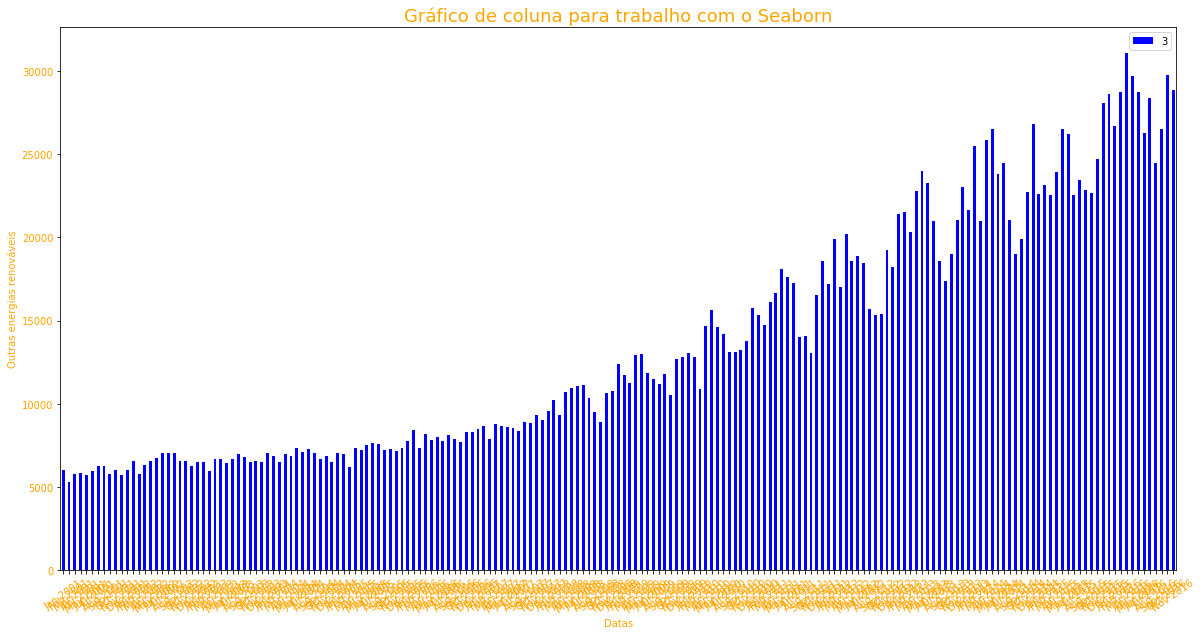

In [212]:
# Montando o gráfico para duas colunas - 
fi1=df_tabela1.plot.bar(facecolor='blue',figsize=(20,10), width = 0.5)

plt.title('Gráfico de coluna para trabalho com o Seaborn', fontsize=18, color='orange')
plt.xticks (color='orange', rotation= 35)
plt.yticks (color='orange')
plt.xlabel('Datas',color='orange')
plt.ylabel('Outras energias renováveis',color='orange')
plt.legend() 
plt.show()

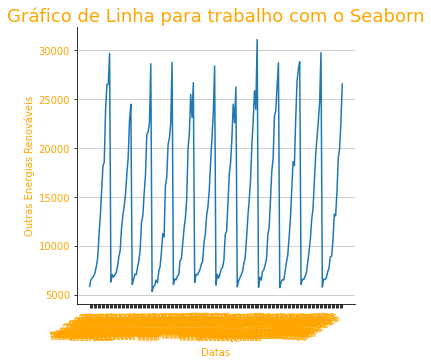

In [219]:
g = sns.relplot(x="Data", y=3, kind="line", data=df_tabela1)
g.fig.autofmt_xdate()
plt.grid(axis='y', alpha=0.75)
plt.title('Gráfico de Linha para trabalho com o Seaborn', fontsize=18, color='orange')
plt.xticks (color='orange')
plt.yticks (color='orange')
plt.xlabel('Datas',color='orange')
plt.ylabel('Outras Energias Renováveis',color='orange')
plt.show()

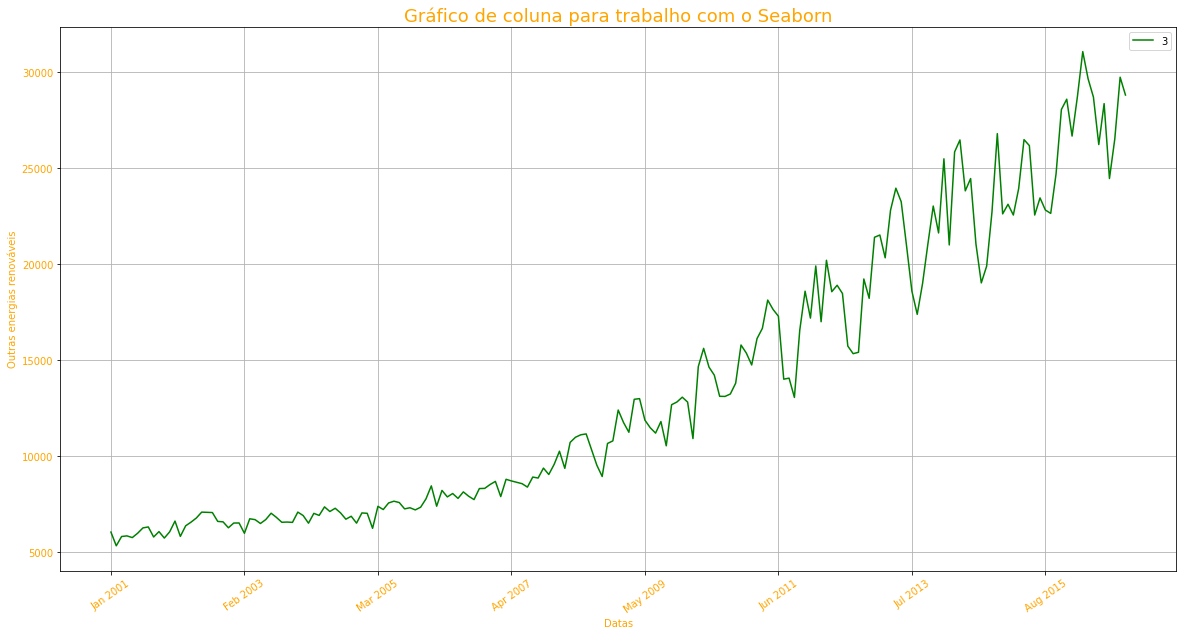

In [223]:
# Montando o gráfico para duas colunas - 
fi1=df_tabela1.plot.line(color='g',figsize=(20,10))

plt.title('Gráfico de coluna para trabalho com o Seaborn', fontsize=18, color='orange')
plt.xticks (color='orange', rotation= 35)
plt.yticks (color='orange')
plt.xlabel('Datas',color='orange')
plt.ylabel('Outras energias renováveis',color='orange')
plt.grid(True)
plt.legend() 
plt.show()